# **Challenge 1**

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')   # Optional, only if you want to save output to Drive


In [ ]:
!git clone https://github.com/hanzla-khalid98/challenge_AN2DL_2025.git

In [ ]:
import sys
sys.path.append('/hanzla-khalid98/challenge_AN2DL_2025/src')

In [2]:
from src.preprocessing import preprocess_pipeline

preprocess_pipeline("pirate_pain_train.csv",
                    "pirate_pain_train_labels.csv",
                    "pirate_pain_test.csv",
                    window_size= 50,
                    stride= 10,
                    n_val_users=60,
                    n_test_users=60,
                    output_dir=".")

c:\Users\alexa\OneDrive\Documents\POLIMI\AN2DL\challenge_AN2DL_2025\src\preprocessing.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_legs'] = df['n_legs'].map(n_legs_mapping)
c:\Users\alexa\OneDrive\Documents\POLIMI\AN2DL\challenge_AN2DL_2025\src\preprocessing.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_hands'] = df['n_hands'].map(n_hands_mapping)
c:\Users\alexa\OneDrive\Documents\POLIMI\AN2DL\challenge_AN2DL_2025\src\preprocessing.py:100: SettingWithCopyWarning: 
A value is tryin

Saved: ./dataset.pt
Saved: ./dataset_inference.pt
Preprocessing completed!


# Unused Code

## ⚙️ **Libraries Import**

In [4]:
# Set seed for reproducibility
SEED = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(SEED)
random.seed(SEED)

# Import PyTorch
import torch
torch.manual_seed(SEED)
from torch import nn
# from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import TensorDataset, DataLoader
logs_dir = "tensorboard"
!pkill -f tensorboard
%load_ext tensorboard
!mkdir -p models

if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")

print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")

# Import other libraries
import copy
import shutil
from itertools import product
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Le chemin d'acc�s sp�cifi� est introuvable.
'pkill' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


PyTorch version: 2.9.0+cpu
Device: cpu


Le chemin d'acc�s sp�cifi� est introuvable.
Un sous-r�pertoire ou un fichier -p existe d�j�.
Une erreur s'est produite lors du traitement de�: -p.
Un sous-r�pertoire ou un fichier models existe d�j�.
Une erreur s'est produite lors du traitement de�: models.


## ⏳ **Data Loading**

## 🔎 **Exploration and Data Analysis**

In [5]:
# Read the dataset into a DataFrame
df = pd.read_csv('pirate_pain_train.csv')

# Remove rows with any missing values
df.dropna(axis=0, how='any', inplace=True)

# Print the shape of the DataFrame
print(f"DataFrame shape: {df.shape}")

# Display the first 10 rows of the DataFrame
df.head(10)

DataFrame shape: (105760, 40)


,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0,0,2,0,2,1,two,two,two,1.094705,...,3.499558e-06,1.945042e-06,3.999558e-06,1.153299e-05,0.000004,0.017592,0.013508,0.026798,0.027815,0.5
1,0,1,2,2,2,2,two,two,two,1.135183,...,3.976952e-07,6.765107e-07,6.019627e-06,4.643774e-08,0.000000,0.013352,0.000000,0.013377,0.013716,0.5
2,0,2,2,0,2,2,two,two,two,1.080745,...,1.533820e-07,1.698525e-07,1.446051e-06,2.424536e-06,0.000003,0.016225,0.008110,0.024097,0.023105,0.5
3,0,3,2,2,2,2,two,two,two,0.938017,...,1.006865e-05,5.511079e-07,1.847597e-06,5.432416e-08,0.000000,0.011832,0.007450,0.028613,0.024648,0.5
4,0,4,2,2,2,2,two,two,two,1.090185,...,4.437266e-06,1.735459e-07,1.552722e-06,5.825366e-08,0.000007,0.005360,0.002532,0.033026,0.025328,0.5
5,0,5,2,0,2,1,two,two,two,1.146031,...,1.073167e-06,1.753837e-07,2.957340e-07,6.217311e-08,0.000007,0.006150,0.006444,0.033101,0.023767,0.5
6,0,6,2,1,2,1,two,two,two,1.025870,...,1.074800e-06,1.772156e-07,1.976558e-06,1.576086e-06,0.000005,0.006495,0.006421,0.031804,0.019056,0.5
7,0,7,2,2,2,2,two,two,two,1.038597,...,8.829074e-07,1.790415e-07,2.210562e-06,1.485741e-06,0.000000,0.015998,0.005397,0.035552,0.015732,0.5
8,0,8,2,2,0,1,two,two,two,0.984251,...,1.621055e-06,1.165161e-06,3.030164e-07,5.416678e-07,0.000000,0.020539,0.008517,0.008635,0.015257,0.5
9,0,9,0,2,2,2,two,two,two,1.054999,...,1.609114e-06,3.959558e-06,2.017157e-06,1.154349e-06,0.000007,0.007682,0.021383,0.034006,0.028966,0.5


In [6]:
df_labels = pd.read_csv('pirate_pain_train_labels.csv')

print(f"DataFrame shape: {df_labels.shape}")
df_labels.head(10)


DataFrame shape: (661, 2)


,sample_index,label
0,0,no_pain
1,1,no_pain
2,2,low_pain
3,3,no_pain
4,4,no_pain
5,5,no_pain
6,6,no_pain
7,7,no_pain
8,8,no_pain
9,9,no_pain


In [7]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105760 entries, 0 to 105759
Data columns (total 40 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sample_index   105760 non-null  int64  
 1   time           105760 non-null  int64  
 2   pain_survey_1  105760 non-null  int64  
 3   pain_survey_2  105760 non-null  int64  
 4   pain_survey_3  105760 non-null  int64  
 5   pain_survey_4  105760 non-null  int64  
 6   n_legs         105760 non-null  object 
 7   n_hands        105760 non-null  object 
 8   n_eyes         105760 non-null  object 
 9   joint_00       105760 non-null  float64
 10  joint_01       105760 non-null  float64
 11  joint_02       105760 non-null  float64
 12  joint_03       105760 non-null  float64
 13  joint_04       105760 non-null  float64
 14  joint_05       105760 non-null  float64
 15  joint_06       105760 non-null  float64
 16  joint_07       105760 non-null  float64
 17  joint_08       105760 non-nul

In [8]:
col_names = df.columns

for col in col_names:
    if 'survey' in col:
        df[col] = df[col].astype(np.int32)
    elif 'joint' in col:
        df[col] = df[col].astype(np.float32)

# Display updated DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105760 entries, 0 to 105759
Data columns (total 40 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sample_index   105760 non-null  int64  
 1   time           105760 non-null  int64  
 2   pain_survey_1  105760 non-null  int32  
 3   pain_survey_2  105760 non-null  int32  
 4   pain_survey_3  105760 non-null  int32  
 5   pain_survey_4  105760 non-null  int32  
 6   n_legs         105760 non-null  object 
 7   n_hands        105760 non-null  object 
 8   n_eyes         105760 non-null  object 
 9   joint_00       105760 non-null  float32
 10  joint_01       105760 non-null  float32
 11  joint_02       105760 non-null  float32
 12  joint_03       105760 non-null  float32
 13  joint_04       105760 non-null  float32
 14  joint_05       105760 non-null  float32
 15  joint_06       105760 non-null  float32
 16  joint_07       105760 non-null  float32
 17  joint_08       105760 non-nul

In [10]:
# Generate descriptive statistics for numerical columns in the DataFrame
df.describe()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,joint_00,joint_01,joint_02,joint_03,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
count,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,...,1.057600e+05,1.057600e+05,1.057600e+05,1.057600e+05,1.057600e+05,105760.000000,105760.000000,105760.000000,105760.000000,105760.0
mean,330.000000,79.500000,1.633746,1.654851,1.653640,1.663134,0.943095,0.916955,0.779296,0.767921,...,3.972126e-05,4.176794e-05,3.561780e-05,3.138109e-05,1.024604e-04,0.041905,0.058244,0.049886,0.062273,0.5
std,190.814948,46.187338,0.682423,0.669639,0.666649,0.661994,0.202049,0.197606,0.295603,0.300786,...,4.974359e-03,5.472111e-03,1.235068e-03,4.063172e-04,3.205551e-03,0.060292,0.079820,0.060773,0.072597,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001015,0.005403,...,0.000000e+00,1.510494e-07,0.000000e+00,1.063144e-08,0.000000e+00,0.000203,0.000000,0.000000,0.000000,0.5
25%,165.000000,39.750000,2.000000,2.000000,2.000000,2.000000,0.828277,0.811445,0.568850,0.520020,...,6.545878e-08,3.321650e-07,3.275038e-07,2.841805e-07,7.161332e-07,0.009885,0.012652,0.016290,0.019638,0.5
50%,330.000000,79.500000,2.000000,2.000000,2.000000,2.000000,1.005126,0.979468,0.909549,0.914834,...,8.302747e-07,1.095971e-06,1.024209e-06,8.746148e-07,3.126723e-06,0.021898,0.031739,0.031843,0.039041,0.5
75%,495.000000,119.250000,2.000000,2.000000,2.000000,2.000000,1.081039,1.056611,0.995187,0.994324,...,2.800090e-06,3.079464e-06,3.021830e-06,2.507548e-06,9.946107e-06,0.048579,0.071051,0.058741,0.079518,0.5
max,660.000000,159.000000,2.000000,2.000000,2.000000,2.000000,1.407968,1.334613,1.306046,1.254729,...,1.442198e+00,1.305001e+00,2.742411e-01,3.643074e-02,9.473540e-01,1.223617,1.187419,1.412037,1.370765,0.5


In [11]:
# drop last column because has no variance
df.drop(columns=['joint_30'], inplace=True)

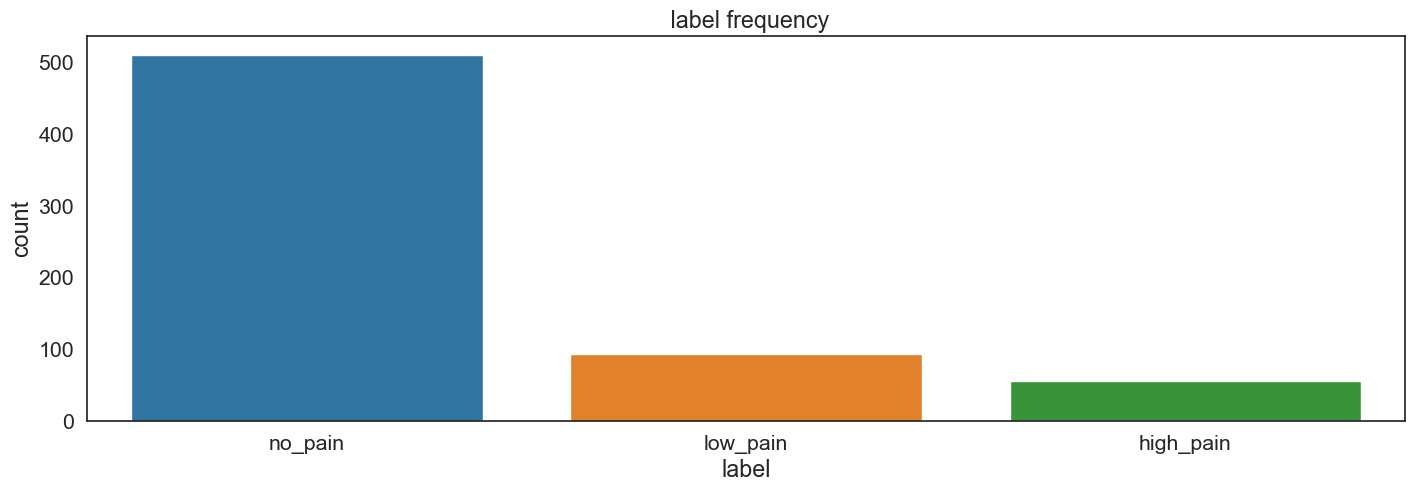

In [12]:
# Visualise the proportion of each label
plt.figure(figsize=(17, 5))
sns.countplot(
    x='label',
    data=df_labels,
    order=df_labels['label'].value_counts().index,
    palette='tab10'
)

# Set the title of the plot
plt.title(' label frequency')

# Display the plot
plt.show()

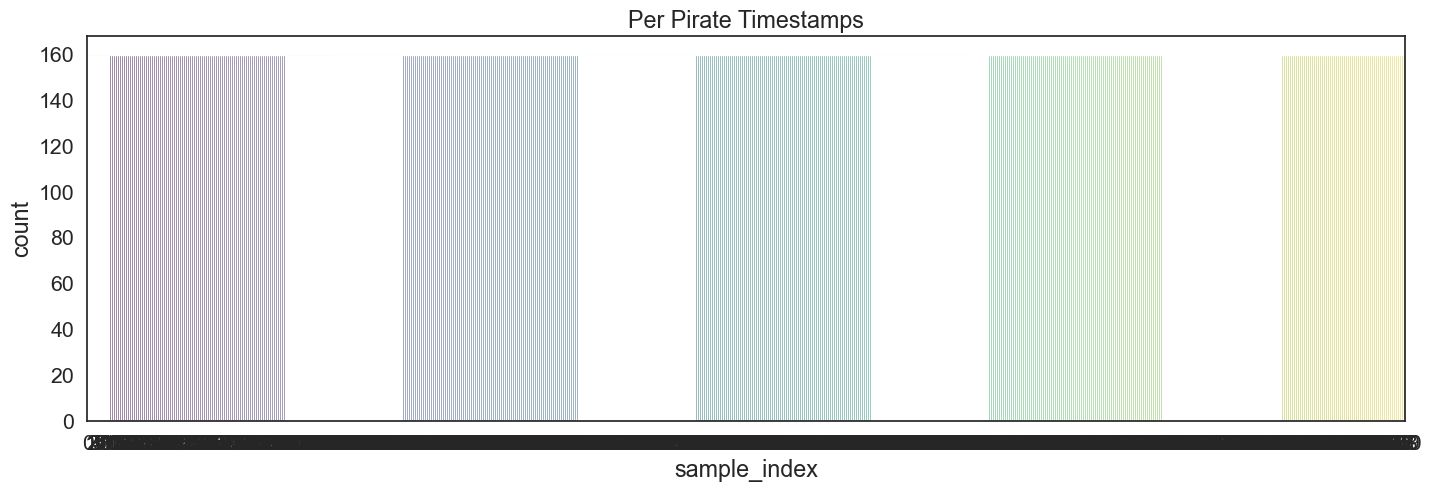

In [13]:
# Count the number of unique pirate
n_users = len(df['sample_index'].unique())

# Create a custom colour map with distinct colours for each user
colors = plt.cm.viridis(np.linspace(0, 1, n_users))

# Visualise the count of timestamps for each user
plt.figure(figsize=(17, 5))
sns.countplot(
    x='sample_index',
    data=df,
    palette=colors
)

# Set the title of the plot
plt.title('Per Pirate Timestamps')

# Display the plot
plt.show()

In [14]:
def inspect_timeseries(index, df, variables):
    # Filter the DataFrame for the specified pirate and variable
    data = df[df['sample_index'] == index][variables]

    # Plot the sensor data for each axis
    axis = data.plot(subplots=True, figsize=(17, 9), title=f"pirates {index}")

    # Adjust legend position for each subplot
    for ax in axis:
        ax.legend(loc='lower right')

In [15]:
# Inspect the sensor data for the activity "Standing"
inspect_timeseries(42, df, ['joint_12', 'pain_survey_1'])

## 🔄 **Data Preprocessing**

In [16]:
# Get unique user IDs and shuffle them
unique_users = df['sample_index'].unique()
random.seed(SEED) # Ensure reproducibility of shuffling
random.shuffle(unique_users)

# Define the number of users for validation and test sets
N_VAL_USERS = 60 # You can change this number
N_TEST_USERS = 60 # You can change this number

# Calculate the number of users for the training set
n_train_users = len(unique_users) - N_VAL_USERS - N_TEST_USERS

# Split the shuffled user IDs into training, validation, and test sets
train_users = unique_users[:n_train_users]
val_users = unique_users[n_train_users:n_train_users + N_VAL_USERS]
test_users = unique_users[n_train_users + N_VAL_USERS:]

# Split the dataset into training, validation, and test sets based on user IDs
df_train = df[df['sample_index'].isin(train_users)]
df_val = df[df['sample_index'].isin(val_users)]
df_test = df[df['sample_index'].isin(test_users)]

# Print the shapes of the training, validation, and test sets
print(f'Training set shape: {df_train.shape}')
print(f'Validation set shape: {df_val.shape}')
print(f'Test set shape: {df_test.shape}')

Training set shape: (86560, 39)
Validation set shape: (9600, 39)
Test set shape: (9600, 39)


In [17]:
# Initialise a dictionary to count occurrences of each activity in the training set
training_labels = {
    'no_pain': 0,
    'low_pain': 0,
    'high_pain': 0
}

# Count occurrences of each activity for unique IDs in the training set
for id in df_train['sample_index'].unique():
    label = df_labels[df_labels['sample_index'] == id]['label'].values[0]
    training_labels[label] += 1

# Print the distribution of training labels
print('Training labels:', training_labels)

Training labels: {'no_pain': 419, 'low_pain': 76, 'high_pain': 46}


In [18]:
# Initialise a dictionary to count occurrences of each activity in the validation set
validation_labels = {
    'no_pain': 0,
    'low_pain': 0,
    'high_pain': 0
}

# Count occurrences of each activity for unique IDs in the validation set
for id in df_val['sample_index'].unique():
    label = df_labels[df_labels['sample_index'] == id]['label'].values[0]
    validation_labels[label] += 1

# Print the distribution of validation labels
print('validation labels:', validation_labels)

validation labels: {'no_pain': 46, 'low_pain': 8, 'high_pain': 6}


In [19]:
# Initialise a dictionary to count occurrences of each activity in the test set
test_labels = {
    'no_pain': 0,
    'low_pain': 0,
    'high_pain': 0
}

# Count occurrences of each activity for unique IDs in the test set
for id in df_test['sample_index'].unique():
    label = df_labels[df_labels['sample_index'] == id]['label'].values[0]
    test_labels[label] += 1

# Print the distribution of test labels
print('test labels:', test_labels)

test labels: {'no_pain': 46, 'low_pain': 10, 'high_pain': 4}


In [20]:
# Define a mapping of label names to integer labels
label_mapping = {
    'no_pain': 0,
    'low_pain': 1,
    'high_pain': 2
}

# Map label names to integers in the dataframe
df_labels['label'] = df_labels['label'].map(label_mapping)


In [21]:
n_legs_mapping = {
    'two': 1,
    'one+peg_leg': 0
}

n_hands_mapping = {
    'two': 1,
    'one+hook_hand': 0
}

n_eyes_mapping = {
    'two': 1,
    'one+eye_patch': 0
}


# Map n_legs, n_hands and n_eyes names to integers in the train set
df_train['n_legs'] = df_train['n_legs'].map(n_legs_mapping)
df_train['n_hands'] = df_train['n_hands'].map(n_hands_mapping)
df_train['n_eyes'] = df_train['n_eyes'].map(n_eyes_mapping)

# Map n_legs, n_hands and n_eyes names to integers in the validation set
df_val['n_legs'] = df_val['n_legs'].map(n_legs_mapping)
df_val['n_hands'] = df_val['n_hands'].map(n_hands_mapping)
df_val['n_eyes'] = df_val['n_eyes'].map(n_eyes_mapping)

# Map n_legs, n_hands and n_eyes names to integers in the test set
df_test['n_legs'] = df_test['n_legs'].map(n_legs_mapping)
df_test['n_hands'] = df_test['n_hands'].map(n_hands_mapping)
df_test['n_eyes'] = df_test['n_eyes'].map(n_eyes_mapping)


In [22]:
# Define the columns to be normalised
scale_columns = list(df.columns[2:5]) + list(df.columns[9:])

# Calculate the minimum and maximum values from the training data only
mins = df_train[scale_columns].min()
maxs = df_train[scale_columns].max()

# Apply normalisation to the specified columns in all datasets
for column in scale_columns:
    # Normalise the training set
    df_train[column] = (df_train[column] - mins[column]) / (maxs[column] - mins[column])

    # Normalise the validation set
    df_val[column] = (df_val[column] - mins[column]) / (maxs[column] - mins[column])

    # Normalise the test set
    df_test[column] = (df_test[column] - mins[column]) / (maxs[column] - mins[column])

In [23]:
# Display the first five rows of the training DataFrame
print(df_train.shape)
df_train.head()

(86560, 39)


,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_20,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29
0,0,0,1.0,0.0,1.0,1,1,1,1,0.777507,...,5.602345e-07,2.426544e-06,1.374706e-06,0.000015,3.162814e-04,0.000004,0.014211,0.011376,0.018978,0.020291
1,0,1,1.0,1.0,1.0,2,1,1,1,0.806256,...,1.762731e-06,2.757563e-07,4.026520e-07,0.000022,9.828599e-07,0.000000,0.010745,0.000000,0.009473,0.010006
2,0,2,1.0,0.0,1.0,2,1,1,1,0.767592,...,5.228800e-07,1.063529e-07,1.440847e-08,0.000005,6.626013e-05,0.000003,0.013093,0.006830,0.017065,0.016856
3,0,3,1.0,1.0,1.0,2,1,1,1,0.666220,...,3.355327e-05,6.981461e-06,3.065580e-07,0.000007,1.199337e-06,0.000000,0.009502,0.006274,0.020264,0.017981
4,0,4,1.0,1.0,1.0,2,1,1,1,0.774297,...,1.859409e-05,3.076737e-06,1.723862e-08,0.000006,1.307199e-06,0.000007,0.004212,0.002132,0.023389,0.018477


In [24]:
# Define the window size
WINDOW_SIZE = 50

# Define the stride for overlapping windows
STRIDE = 10

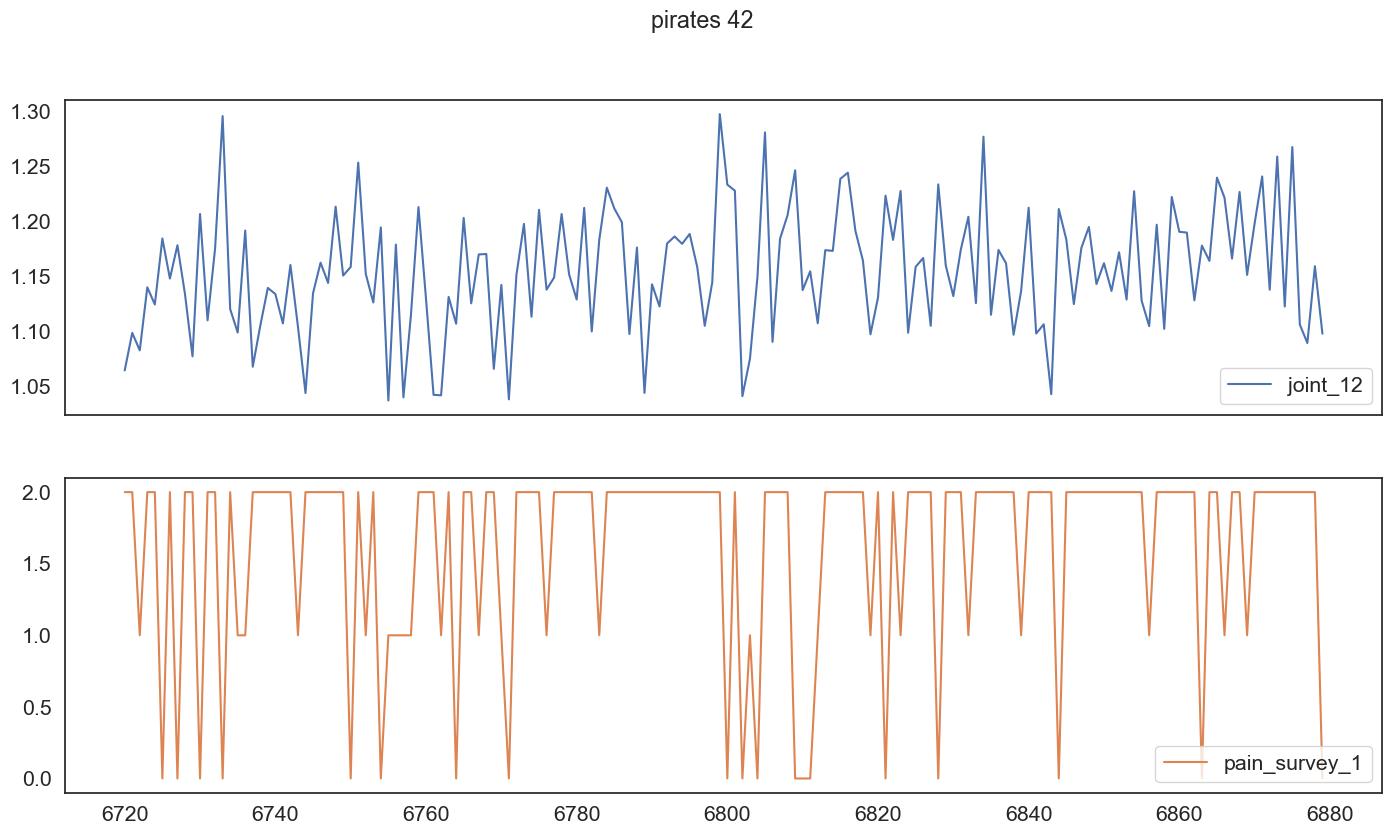

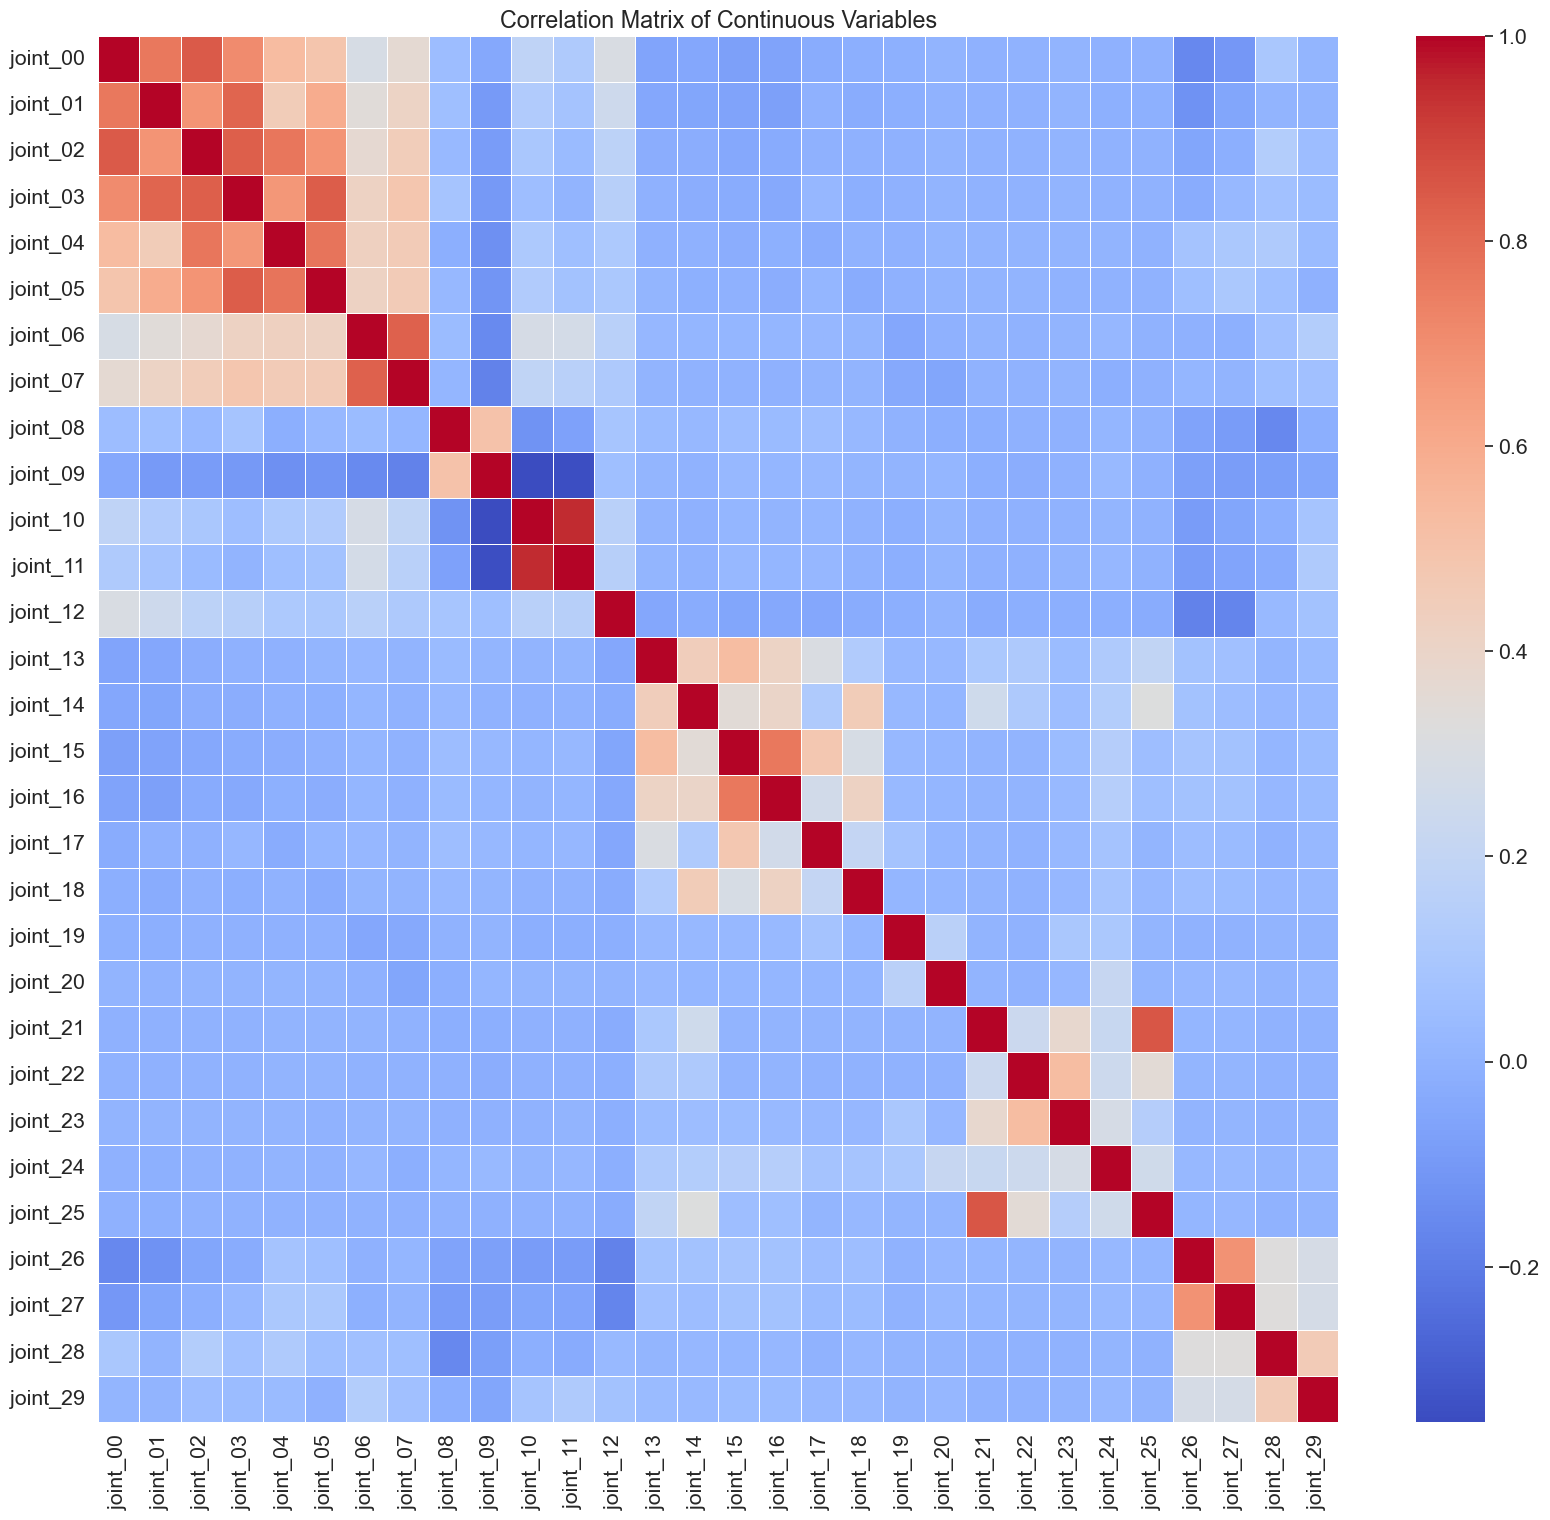

In [25]:
# Select only the continuous variables for the correlation matrix
# Exclude 'sample_index' as it's an identifier
continuous_vars = df.columns[9:39]

# Calculate the correlation matrix
correlation_matrix = df[continuous_vars].corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

In [26]:
def build_sequences(df_data, df_labels, window=200, stride=200):
    # Sanity check to ensure the window is divisible by the stride
    assert window % stride == 0

    # Define feature columns for the pirate dataset
    # These include pain surveys, n_legs, n_hands, n_eyes, and joint data
    feature_columns = ['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4',
                       'n_legs', 'n_hands', 'n_eyes'] + [f'joint_{i:02d}' for i in range(30)] # joint_30 was dropped earlier

    # Initialise lists to store sequences and their corresponding labels
    dataset = []
    labels = []

    # Iterate over unique sample_index in the DataFrame
    for sample_idx in df_data['sample_index'].unique():
        # Extract sensor data for the current sample_idx
        # Convert to float32 for consistency
        temp = df_data[df_data['sample_index'] == sample_idx][feature_columns].values.astype(np.float32)

        # Retrieve the pain label for the current sample_idx from df_labels
        label = df_labels[df_labels['sample_index'] == sample_idx]['label'].values[0]

        # Calculate padding length to ensure full windows
        num_features = temp.shape[1]
        padding_len = window - (len(temp) % window)


        # Create zero padding and concatenate with the data if necessary
        padding = np.zeros((padding_len, num_features), dtype='float32')
        temp = np.concatenate((temp, padding))

        # Build feature windows and associate them with labels
        idx = 0
        while idx + window <= len(temp):
            dataset.append(temp[idx:idx + window])
            labels.append(label)
            idx += stride

    # Convert lists to numpy arrays for further processing
    dataset = np.array(dataset)
    labels = np.array(labels)

    return dataset, labels

In [27]:
# Generate sequences and labels for the training set
X_train, y_train = build_sequences(df_train, df_labels,WINDOW_SIZE, STRIDE)

# Generate sequences and labels for the validation set
X_val, y_val = build_sequences(df_val, df_labels,WINDOW_SIZE, STRIDE)

# Generate sequences and labels for the test set
X_test, y_test = build_sequences(df_test, df_labels,WINDOW_SIZE, STRIDE)

# Print the shapes of the generated datasets and their labels
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((8656, 50, 37), (8656,), (960, 50, 37), (960,), (960, 50, 37), (960,))

In [28]:
# Define the input shape based on the training data
input_shape = X_train.shape[1:]

# Define the number of classes based on the categorical labels
num_classes = len(np.unique(y_train))

In [29]:
# Convert numpy arrays to PyTorch datasets (pairs features with labels)
train_ds = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

In [30]:

torch.save({
    "X_train": torch.from_numpy(X_train),
    "y_train": torch.from_numpy(y_train),
    
    "X_val": torch.from_numpy(X_val),
    "y_val": torch.from_numpy(y_val),
    
    "X_test": torch.from_numpy(X_test),
    "y_test": torch.from_numpy(y_test),
}, "dataset.pt")

In [31]:
data = torch.load("dataset.pt")

train_ds = TensorDataset(data["X_train"], data["y_train"])
val_ds   = TensorDataset(data["X_val"], data["y_val"])
test_ds  = TensorDataset(data["X_test"], data["y_test"])

## Preprocessing test data for inference

In [32]:
df_inference = pd.read_csv("pirate_pain_test.csv")
df_inference.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0,0,2,2,2,2,two,two,two,0.842535,...,0.000003,0.000004,0.000003,0.000003,0.000068,0.019372,0.066324,0.022228,0.013576,0.5
1,0,1,2,2,2,2,two,two,two,0.898836,...,0.000003,0.000004,0.000004,0.000003,0.000029,0.069747,0.080417,0.023650,0.038793,0.5
2,0,2,2,2,2,2,two,two,two,0.957765,...,0.000006,0.000004,0.000009,0.000004,0.000008,0.054968,0.058811,0.027023,0.054202,0.5
3,0,3,1,2,2,2,two,two,two,0.832596,...,0.000005,0.000004,0.000003,0.000004,0.000015,0.048695,0.047128,0.016151,0.024983,0.5
4,0,4,2,2,2,0,two,two,two,0.805971,...,0.000006,0.000004,0.000003,0.000003,0.000008,0.019762,0.031116,0.015618,0.017931,0.5


In [33]:
col_names = df_inference.columns

for col in col_names:
    if 'survey' in col:
        df_inference[col] = df_inference[col].astype(np.int32)
    elif 'joint' in col:
        df_inference[col] = df_inference[col].astype(np.float32)

# Display updated DataFrame information
df_inference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211840 entries, 0 to 211839
Data columns (total 40 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sample_index   211840 non-null  int64  
 1   time           211840 non-null  int64  
 2   pain_survey_1  211840 non-null  int32  
 3   pain_survey_2  211840 non-null  int32  
 4   pain_survey_3  211840 non-null  int32  
 5   pain_survey_4  211840 non-null  int32  
 6   n_legs         211840 non-null  object 
 7   n_hands        211840 non-null  object 
 8   n_eyes         211840 non-null  object 
 9   joint_00       211840 non-null  float32
 10  joint_01       211840 non-null  float32
 11  joint_02       211840 non-null  float32
 12  joint_03       211840 non-null  float32
 13  joint_04       211840 non-null  float32
 14  joint_05       211840 non-null  float32
 15  joint_06       211840 non-null  float32
 16  joint_07       211840 non-null  float32
 17  joint_08       211840 non-nul

In [34]:
# drop last column because has no variance
df_inference.drop(columns=['joint_30'], inplace=True)

In [35]:
n_legs_mapping = {
    'two': 1,
    'one+peg_leg': 0
}

n_hands_mapping = {
    'two': 1,
    'one+hook_hand': 0
}

n_eyes_mapping = {
    'two': 1,
    'one+eye_patch': 0
}


# Map n_legs, n_hands and n_eyes names to integers in the inference set
df_inference['n_legs'] = df_inference['n_legs'].map(n_legs_mapping)
df_inference['n_hands'] = df_inference['n_hands'].map(n_hands_mapping)
df_inference['n_eyes'] = df_inference['n_eyes'].map(n_eyes_mapping)

In [36]:

# Apply normalisation to the specified columns in all datasets
for column in scale_columns:
    # Normalise the training set
    df_inference[column] = (df_inference[column] - mins[column]) / (maxs[column] - mins[column])

In [37]:
def build_sequences_inference(df_data, window=200, stride=200):
    # Sanity check to ensure the window is divisible by the stride
    assert window % stride == 0

    # Define feature columns for the pirate dataset
    # These include pain surveys, n_legs, n_hands, n_eyes, and joint data
    feature_columns = ['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4',
                       'n_legs', 'n_hands', 'n_eyes'] + [f'joint_{i:02d}' for i in range(30)] # joint_30 was dropped earlier

    # Initialise lists to store sequences and their corresponding labels
    dataset = []
    list_sample_idx = []

    # Iterate over unique sample_index in the DataFrame
    for sample_idx in df_data['sample_index'].unique():
        # Extract sensor data for the current sample_idx
        # Convert to float32 for consistency
        temp = df_data[df_data['sample_index'] == sample_idx][feature_columns].values.astype(np.float32)


        # Calculate padding length to ensure full windows
        num_features = temp.shape[1]
        padding_len = window - (len(temp) % window)


        # Create zero padding and concatenate with the data if necessary
        padding = np.zeros((padding_len, num_features), dtype='float32')
        temp = np.concatenate((temp, padding))

        # Build feature windows and associate them with labels
        idx = 0
        while idx + window <= len(temp):
            dataset.append(temp[idx:idx + window])
            list_sample_idx.append(sample_idx)
            idx += stride

    # Convert lists to numpy arrays for further processing
    dataset = np.array(dataset)
    list_sample_idx = np.array(list_sample_idx)

    return dataset, list_sample_idx
X_inference, list_sample_idx = build_sequences_inference(df_inference, WINDOW_SIZE, STRIDE)

In [38]:
torch.save({
    "X_inference": torch.from_numpy(X_inference),
    "list_sample_idx": torch.from_numpy(list_sample_idx)
}, "dataset_inference.pt")

In [39]:
data_inference = torch.load("dataset_inference.pt")

inference_ds = TensorDataset(data_inference["X_inference"])

#  
<img src="https://airlab.deib.polimi.it/wp-content/uploads/2019/07/airlab-logo-new_cropped.png" width="350">

##### Connect with us:
- <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/LinkedIn_icon.svg/2048px-LinkedIn_icon.svg.png" width="14"> **LinkedIn:**  [AIRLab Polimi](https://www.linkedin.com/company/airlab-polimi/)
- <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Instagram_logo_2022.svg/800px-Instagram_logo_2022.svg.png" width="14"> **Instagram:** [airlab_polimi](https://www.instagram.com/airlab_polimi/)

##### Contributors:
- **Eugenio Lomurno**: eugenio.lomurno@polimi.it
- **Alberto Archetti**: alberto.archetti@polimi.it
- **Roberto Basla**: roberto.basla@polimi.it
- **Carlo Sgaravatti**: carlo.sgaravatti@polimi.it

```
   Copyright 2025 Eugenio Lomurno, Alberto Archetti, Roberto Basla, Carlo Sgaravatti

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
```